<a href="https://colab.research.google.com/github/abdulhameed04/Rainfall-Prediction-Project--Kaggle-Competition/blob/main/Rainfall_Prediction_Python_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 1. Load data

In [ ]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 2. Quick EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB
None
                id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.94

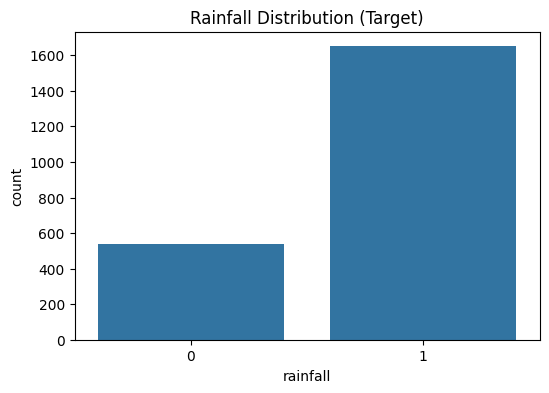

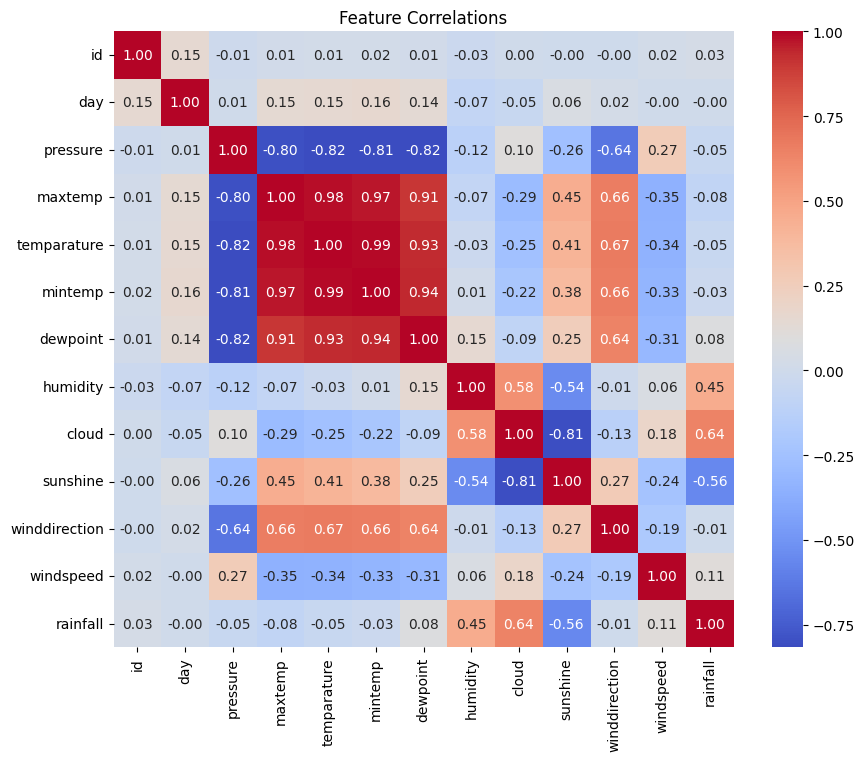

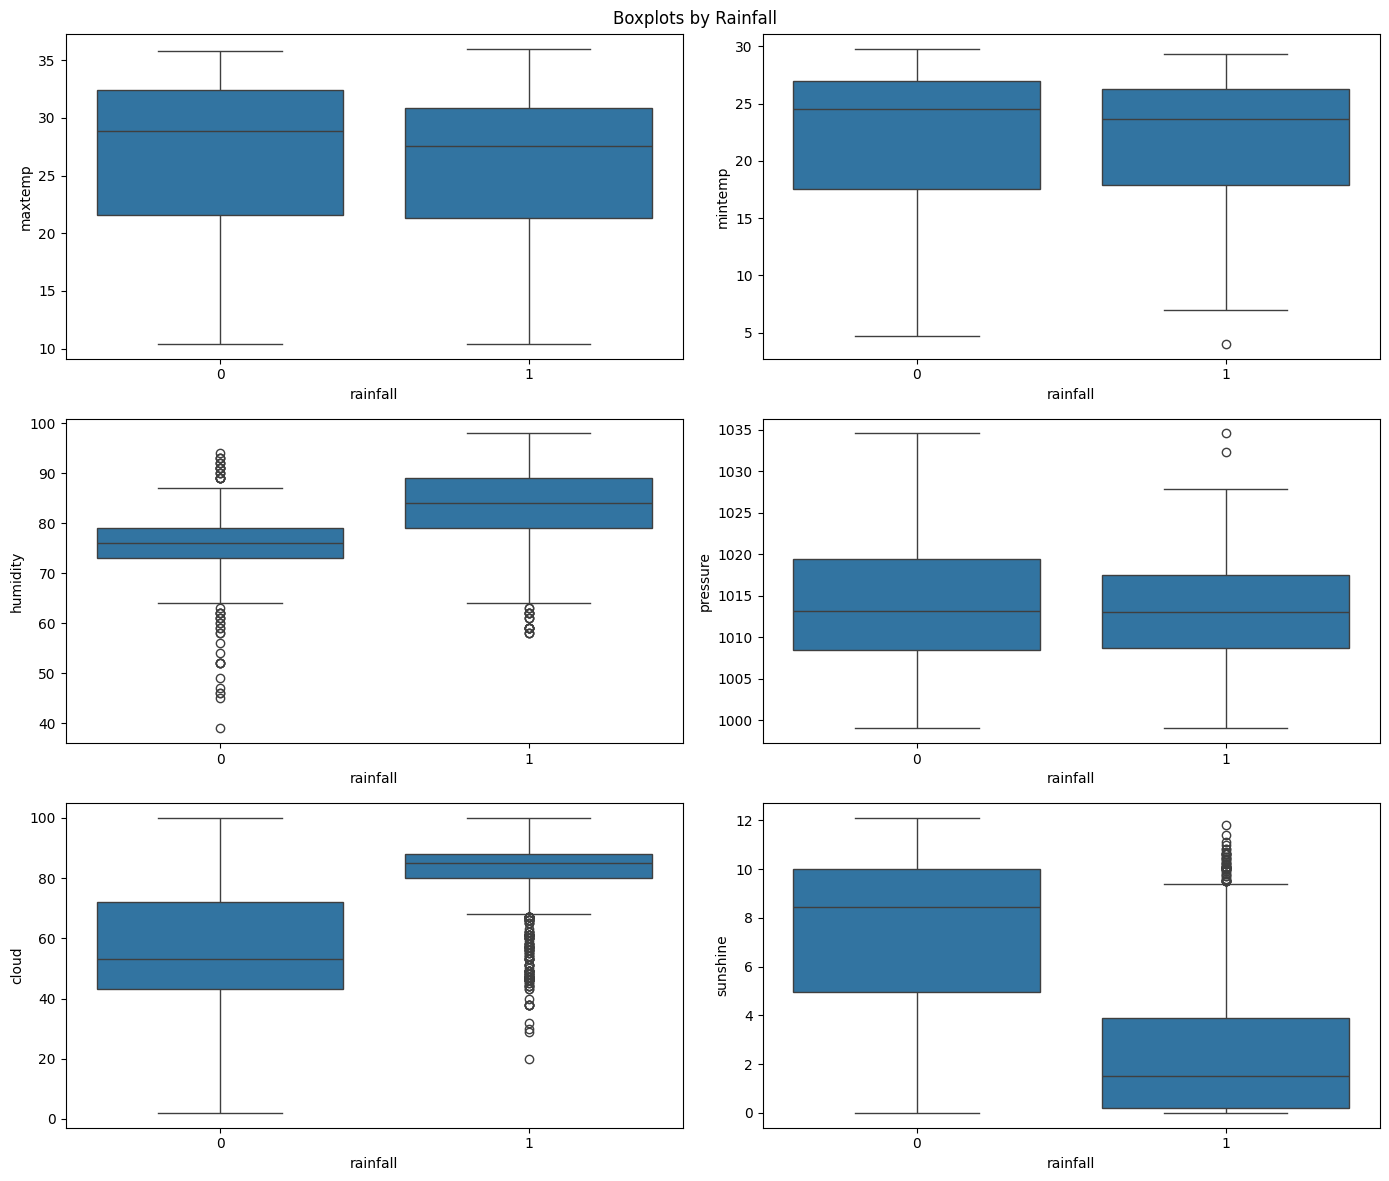

In [ ]:


# Basic info
print(train.info())
print(train.describe())
print(train['rainfall'].value_counts())

# Check for missing values
print('Missing values (train):\n', train.isnull().sum())
print('Missing values (test):\n', test.isnull().sum())

# Visualize target
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall', data=train)
plt.title('Rainfall Distribution (Target)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
corr = train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlations')
plt.show()

# Boxplots for key features
fig, axes = plt.subplots(3, 2, figsize=(14,12))
features = ['maxtemp', 'mintemp', 'humidity', 'pressure', 'cloud', 'sunshine']
for i, feat in enumerate(features):
    sns.boxplot(x='rainfall', y=feat, data=train, ax=axes[i//2, i%2])
fig.suptitle('Boxplots by Rainfall')
plt.tight_layout()
plt.show()


# 3. Feature Engineering

In [ ]:

# Example: difference between max and min temp
train['temp_range'] = train['maxtemp'] - train['mintemp']
test['temp_range'] = test['maxtemp'] - test['mintemp']


# 4. Prepare data for modeling

In [ ]:

features = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
            'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'temp_range']

X = train[features]
y = train['rainfall']

# Split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Model training

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       108
           1       0.88      0.94      0.91       330

    accuracy                           0.86       438
   macro avg       0.83      0.78      0.80       438
weighted avg       0.86      0.86      0.85       438

Confusion Matrix:
[[ 66  42]
 [ 19 311]]
Feature Importances:
 cloud            0.267260
sunshine         0.207094
humidity         0.086832
dewpoint         0.063117
windspeed        0.059192
maxtemp          0.057827
temparature      0.057043
pressure         0.055827
mintemp          0.054454
temp_range       0.054061
winddirection    0.037294
dtype: float64


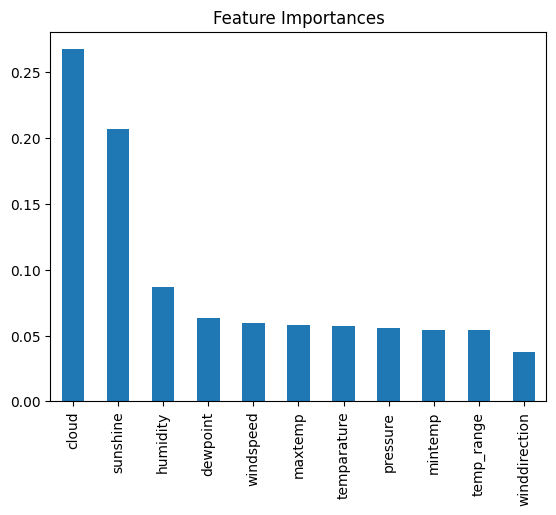

In [ ]:


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Validation predictions
y_pred = rf.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Feature importances
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
print("Feature Importances:\n", feat_imp)

feat_imp.plot(kind='bar')
plt.title('Feature Importances')
plt.show()


# 6. Predict on test set and prepare submission

In [ ]:

test_pred = rf.predict(test[features])
submission = sample_submission.copy()
submission['rainfall'] = test_pred
submission.to_csv('rainfall_submission.csv', index=False)
print("Submission file saved as 'rainfall_submission.csv'")


Submission file saved as 'rainfall_submission.csv'
